In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLP_util import *

In [13]:
train_set_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
m_train = train_set_x.shape[0]
train_set_x = (train_set_x.reshape(m_train,-1)).T
train_set_y = np.array([0, 1, 1, 0])
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))

test_set_x = np.array([[0, 1]])
m_test = test_set_x.shape[0]
test_set_x = (test_set_x.reshape(m_test,-1)).T
test_set_y = np.array([1])
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
print("Size of train set input : " + str(train_set_x.shape))
print("Size of train set output : " + str(train_set_y.shape))
print("Size of test set input : " + str(test_set_x.shape))
print("Size of test set output : " + str(test_set_y.shape))

Size of train set input : (2, 4)
Size of train set output : (1, 4)
Size of test set input : (2, 1)
Size of test set output : (1, 1)


In [14]:
layers_dims = [2, 5, 1]

def L_layer_NN(X, Y, layers_dims, learningRate = 0.0075, num_itr = 2500, printCost = False):
    np.random.seed(1)
    grads = {}
    costs = []
    Afn = {}
    dfn = {}
    parameters = initialize_parameters_layers(layers_dims)
    Afn["A1"] = X
    m = X.shape[1]
    for i in range(0, num_itr):
        # A1 is input layer
        L = len(layers_dims)
        for l in range(1, L-1):
            Afn["A"+str(l+1)] = linear_activation_fwd(Afn["A"+str(l)], parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        Afn["A"+str(L)] = linear_activation_fwd(Afn["A"+str(L-1)], parameters["W"+str(L-1)], parameters["b"+str(L-1)], "sigmoid")
        #print(str(Afn["A2"]))
        cost = compute_cost(Afn["A"+str(L)], Y)
        dfn["d"+str(L)] = Afn["A"+str(L)] - Y
        for l in reversed(range(2, L)):
            C = np.zeros(Afn["A"+str(l)].shape)
            Z = linear_fwd(Afn["A"+str(l-1)], parameters["W"+str(l-1)],  parameters["b"+str(l-1)])
            C = (Z>0) * 1.0
            dfn["d"+str(l)] = np.dot((parameters["W"+str(l)]).T, dfn["d"+str(l+1)]) * C
        grads["db"+str(L-1)] = (1./m) * (np.sum(dfn["d"+str(L)]))
        grads["dW"+str(L-1)] = (1./m) * (np.dot(dfn["d"+str(L)], Afn["A"+str(L-1)].T))
        for l in range(1, L-1):
            grads["dW"+str(l)] = (1./m) * (np.dot(dfn["d"+str(l+1)], Afn["A"+str(l)].T))
            grads["db"+str(l)] = (1./m) * (np.sum(dfn["d"+str(l+1)], axis = 1, keepdims = True))
        parameters = update_parameters(parameters, grads, learningRate)
        #print(str(b1))
        if printCost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if printCost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learningRate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6833945492093881
Cost after iteration 100: 0.5539767824163431
Cost after iteration 200: 0.4529797495265252
Cost after iteration 300: 0.3681086082308676
Cost after iteration 400: 0.2880419267836909
Cost after iteration 500: 0.21809485247829105
Cost after iteration 600: 0.16449823669870517
Cost after iteration 700: 0.12623923924615937
Cost after iteration 800: 0.0998986048349291
Cost after iteration 900: 0.08101556314171277
Cost after iteration 1000: 0.0675824515021186
Cost after iteration 1100: 0.057281363586434327
Cost after iteration 1200: 0.04963589904822781
Cost after iteration 1300: 0.04340501960517096
Cost after iteration 1400: 0.03857049900754912


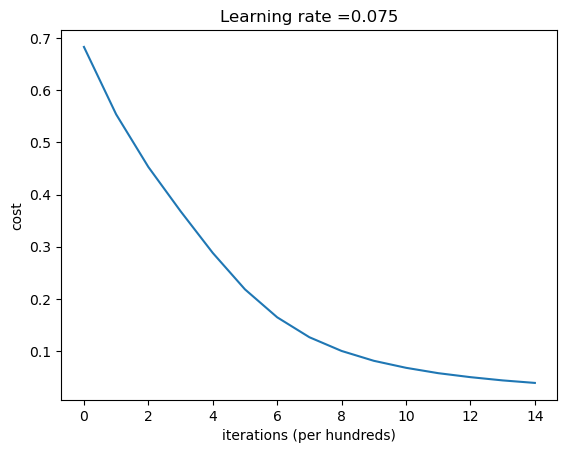

In [15]:
parameters = L_layer_NN(train_set_x, train_set_y, layers_dims, learningRate = 0.075, num_itr = 1500, printCost = True)

In [11]:
print("***Training Set***")
pred = predict(train_set_x, train_set_y, parameters, layers_dims)
print("***Test Set***")
pred = predict(test_set_x, test_set_y, parameters, layers_dims)

***Training Set***
Accuracy : 1.0
***Test Set***
Accuracy : 1.0


In [16]:
y_actu = pd.Series(test_set_y[0], name='Actual')
y_pred = pd.Series(pred[0], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1.0
Actual,
1,1
